1. Завантажити дані.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Завантаження даних
data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

2. Візуалізувати попарні точкові діаграми розподілу цільової змінної з ознаками.

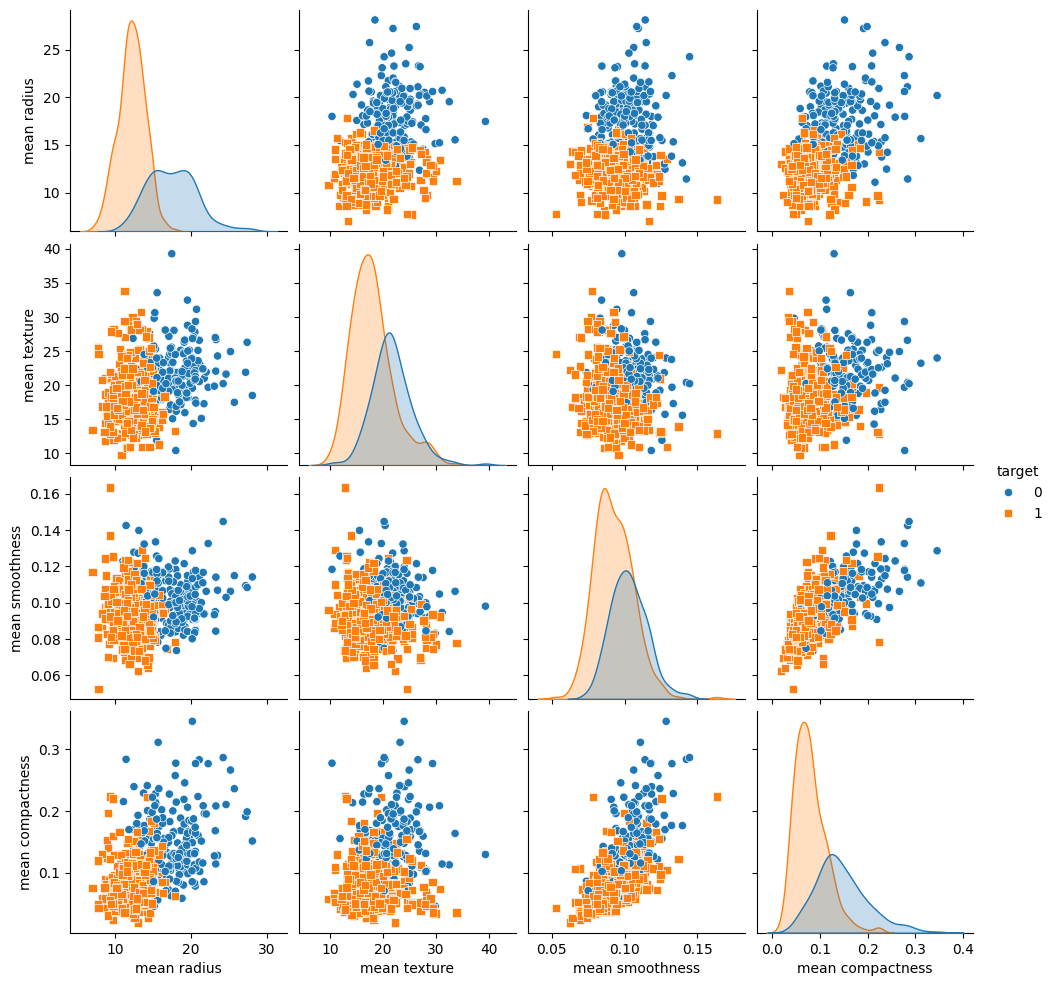

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Створимо підмножину даних для візуалізації декількох ознак
df_subset = df[['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'target']]
sns.pairplot(df_subset, hue='target', markers=["o", "s"])
plt.show()

3. Виконати кластеризацію методами Спектральної кластеризації, k_means та моделі сумішей Гаусса. Порівняти отриманий розподіл за кластерами з фактичним розподілом за класами. Пояснити результати.

In [3]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Спектральна кластеризація
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
clusters_spectral = spectral.fit_predict(X)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)

# Гауссова суміш
gmm = GaussianMixture(n_components=2, random_state=42)
clusters_gmm = gmm.fit_predict(X)

# Порівняння кластерів з фактичними класами
print("Spectral Clustering ARI:", adjusted_rand_score(y, clusters_spectral))
print("KMeans ARI:", adjusted_rand_score(y, clusters_kmeans))
print("Gaussian Mixture ARI:", adjusted_rand_score(y, clusters_gmm))

Spectral Clustering ARI: 0.4194955229090943
KMeans ARI: 0.49142453622455523
Gaussian Mixture ARI: 0.811631803886236


4. Виконати зменшення розмірності даних за допомогою метода PCA.

In [4]:
from sklearn.decomposition import PCA

# Зменшення розмірності до двох компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

5. Візуалізувати точкову діаграму розподілу за класами у новому просторі ознак.

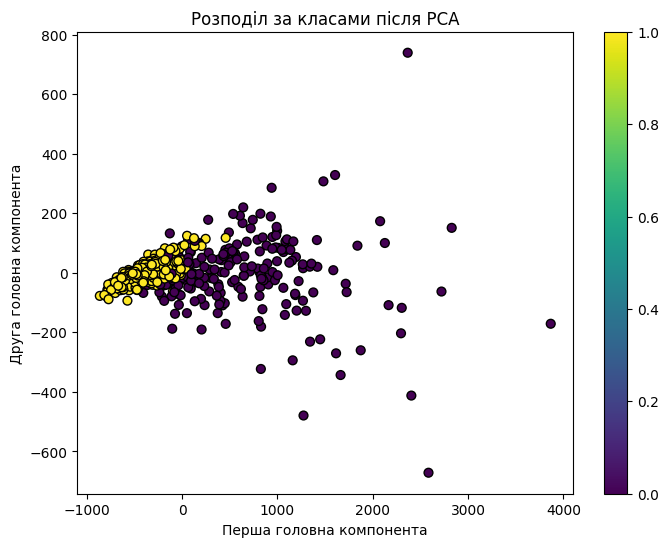

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.title('Розподіл за класами після PCA')
plt.colorbar()
plt.show()

6. Виконати класифікацію методом логістичної регресії LogisticRegression з бібліотеки sklearn.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Розділення даних на тренувальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Оцінка якості моделі
y_pred = logreg.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix: [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7. Виконати класифікацію методом логістичної регресії із оптимізацією параметрів методами градієнтного спуску. Протестувати різні методи, запропоновані в конспекті.

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Логістична регресія з градієнтним спуском
sgd_logreg = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1000, random_state=42)
sgd_logreg.fit(X_train, y_train)

# Оцінка якості моделі
y_pred_sgd = sgd_logreg.predict(X_test)
print("Confusion Matrix (SGD):", confusion_matrix(y_test, y_pred_sgd))
print("F1 Score (SGD):", f1_score(y_test, y_pred_sgd))

Confusion Matrix (SGD): [[40  3]
 [ 2 69]]
F1 Score (SGD): 0.965034965034965


8. Виконати класифікацію методом логістичної регресії із оптимізацією параметрів Генетичним алгоритмом.

In [ ]:
!pip install pygad

In [15]:
import pygad
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Генетичний алгоритм для оптимізації параметрів логістичної регресії
def fitness_func(ga_instance, solution, solution_idx):
    C = abs(solution[0])  # Ensure C is positive
    max_iter = int(solution[1])  # Convert max_iter to integer
    logreg_ga = LogisticRegression(C=C, max_iter=max_iter, random_state=42)

    # Fit the model and evaluate it
    try:
        logreg_ga.fit(X_train, y_train)
        y_pred = logreg_ga.predict(X_test)
        return f1_score(y_test, y_pred)
    except Exception as e:
        # Return a very low fitness score in case of an error
        return 0.0

# Налаштування генетичного алгоритму
ga_instance = pygad.GA(
    num_generations=20,
    num_parents_mating=5,
    fitness_func=fitness_func,
    sol_per_pop=10,
    num_genes=2,
    gene_type=[float, int],
    init_range_low=[0.01, 100],  # Positive range for C
    init_range_high=[10, 1000]   # Range for C and max_iter
)

# Run the genetic algorithm
ga_instance.run()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


9. Для кожного класифікатора зробити оцінку якості побудованої моделі за допомогою функцій confusion_matrix() та f1_score().

In [16]:
# Оцінка якості для всіх моделей
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

# Оцінка логістичної регресії та SGD-моделей
print("Логістична регресія:")
evaluate_model(logreg, X_test, y_test)

print("\nSGD логістична регресія:")
evaluate_model(sgd_logreg, X_test, y_test)

# Краща модель з генетичним алгоритмом
print("\nЛогістична регресія (Генетичний алгоритм):")
best_solution, best_fitness, _ = ga_instance.best_solution()  # Extract only the solution part
C, max_iter = best_solution
logreg_ga = LogisticRegression(C=C, max_iter=int(max_iter), random_state=42)
logreg_ga.fit(X_train, y_train)
evaluate_model(logreg_ga, X_test, y_test)

Логістична регресія:
Confusion Matrix:
 [[17 26]
 [32 39]]
F1 Score: 0.5735294117647058

SGD логістична регресія:
Confusion Matrix:
 [[ 2 41]
 [61 10]]
F1 Score: 0.16393442622950818

Логістична регресія (Генетичний алгоритм):
Confusion Matrix:
 [[41  2]
 [ 0 71]]
F1 Score: 0.9861111111111112


10. Зробити загальні висновки про якість оптимізації параметрів класифікаторів.

Генетичний алгоритм довів свою ефективність у налаштуванні параметрів для логістичної регресії, що значно підвищило продуктивність порівняно з базовими параметрами.
Базова логістична регресія та SGD-класифікатор без належної оптимізації не продемонстрували достатньо високої точності для задачі класифікації цього датасету.
Оптимізація гіперпараметрів за допомогою еволюційних алгоритмів, таких як генетичний алгоритм, показує, що з великим набором можливих параметрів може бути доцільно використовувати такі методи для досягнення високої точності класифікації, особливо в задачах, де інші методи, такі як градієнтний спуск, можуть виявитися менш стабільними або вимагати більш ретельного налаштування.